<a href="https://colab.research.google.com/github/siddhant-parmar/CMPE_255_Group_4/blob/main/Team_Project_Restaurant_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PART 1: EDA and Data Cleaning.

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import os.path

In [3]:
comment = """RUNNING - Initial EDA and Cleaning.
This script will run the initial cleaning and exploratory analysis 
and generate the following files - 
1. Plots for various analyses (png)
2. Final cleaned data files (csv)"""
print(comment)

RUNNING - Initial EDA and Cleaning.
This script will run the initial cleaning and exploratory analysis 
and generate the following files - 
1. Plots for various analyses (png)
2. Final cleaned data files (csv)


In [4]:
yelp_business_df = pd.read_csv("/content/drive/My Drive/converted_data/yelp_academic_dataset_business.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   attributes.BYOB                        3519 non-null    object 
 1   attributes.AcceptsInsurance            7168 non-null    object 
 2   attributes.DriveThru                   6038 non-null    object 
 3   state                                  160585 non-null  object 
 4   attributes.HasTV                       44495 non-null   object 
 5   attributes.DietaryRestrictions         68 non-null      object 
 6   attributes.RestaurantsCounterService   40 non-null      object 
 7   attributes.Ambience                    43882 non-null   object 
 8   postal_code                            160475 non-null  object 
 9   address                                153859 non-null  object 
 10  attributes.WheelchairAccessible        29370 non-null   

Scrub and Explore

We will explore the following features for our study -

- Stars
- Is Open
- State and City
- Review Count
- Name
- Neighborhood (Not present in the current dataset hence we will not consider this)
- Postal Code
- Categories
- Latitude/Longitude
- Address

## 1. Stars

In [6]:
yelp_business_df.stars.value_counts()

4.0    34056
3.5    28835
4.5    28072
3.0    21583
5.0    19953
2.5    13720
2.0     8523
1.5     4157
1.0     1686
Name: stars, dtype: int64

In [7]:
yelp_business_df.stars = yelp_business_df['stars'].astype('category')

In [8]:
yelp_business_df.stars.dtype

CategoricalDtype(categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ordered=False)

## 2. Open/Shut down Businesses

In [9]:
yelp_business_df.is_open.value_counts()

1    123248
0     37337
Name: is_open, dtype: int64

In [10]:
yelp_business_df[yelp_business_df.is_open == 0][['name','city','state']].head(15)

,name,city,state
9,Capital City Barber Shop,Austin,TX
14,Uncle Sam's Pawn Shop,Columbus,OH
17,Saratoga Resort Villas,Kissimmee,FL
20,Jasmine Nail Spa,Portland,OR
21,Tire Town Auto Service,Vancouver,BC
22,Cascade Restaurant,Orlando,FL
25,Wolf Camera and Image,Atlanta,GA
35,Espresso Minute,Boston,MA
38,El Pollo Rey,Austin,TX
44,Sam's Club,Fern Park,FL


Validated that these business listings are closed. e.g. https://www.yelp.com/biz/cks-bbq-and-catering-henderson?osq=CK%27S+BBQ+%26+Catering Only working with open businesses in this study.

In [11]:
yelp_business_df = yelp_business_df[yelp_business_df.is_open == 1]

## 3. State and City

In [12]:
yelp_business_df.state.value_counts()

MA     27353
OR     18806
TX     18500
FL     17916
GA     13824
BC     12734
OH      9072
WA      2575
CO      2431
CA        12
NH         4
NY         2
VA         2
ON         2
ME         1
NC         1
MN         1
KY         1
NM         1
WY         1
AZ         1
WI         1
DE         1
HI         1
DC         1
OK         1
MI         1
ABE        1
KS         1
Name: state, dtype: int64

In [13]:
print("Number of Unique States: " + str(len(yelp_business_df.state.unique())))

Number of Unique States: 29


In [17]:
yelp_business_df[yelp_business_df.state == 'CA'][['name','city', 'state']]

,name,city,state
1819,Katia Photography,Portland,CA
47726,Here We Grow,Atlanta,CA
70731,Disney Carribean Beach Resort,Orlando,CA
71354,Vain Spa,Irvine,CA
95203,Diosa Dreads,Portland,CA
103921,Kristen Beccia Photography,Austin,CA
128258,San Jose Jazz Summer Fesitval,San Jose,CA
130618,"New Albany Elite Dental - Andrew E. Skasko, DDS",New Albany,CA
144056,Samuel Rivera Photography,Orlando,CA
148696,DMA Academy,Vancouver,CA


A lot of invalid data, for example Austin is in Texas, but shown here in California. Another example is that Vancouver is shown in California, USA instead of British Columbia, Canada.

Also there are a lot of invalid states like 'ABE'.

For this project, we are considering cities and states situated in USA only.

### 3.1 Problem 1: Invalid States

In [15]:
USA_states = pd.read_csv('/content/drive/My Drive/converted_data/state_table.csv')

In [18]:
USA_states.head() # https://statetable.com/

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1.0,Ala.,IV,3.0,South,6.0,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2.0,Alaska,X,4.0,West,9.0,Pacific,9
2,3,Arizona,AZ,USA,state,10,current,occupied,NaN,4.0,Ariz.,IX,4.0,West,8.0,Mountain,9
3,4,Arkansas,AR,USA,state,10,current,occupied,NaN,5.0,Ark.,VI,3.0,South,7.0,West South Central,8
4,5,California,CA,USA,state,10,current,occupied,NaN,6.0,Calif.,IX,4.0,West,9.0,Pacific,9


In [19]:
USA_states = USA_states[['name','abbreviation','country','census_region','census_division']]

In [20]:
USA_states = USA_states.rename(index=str, columns={"name" : "State_Name", "abbreviation" : "State_Abb"})

In [21]:
USA_states.head(60)

,State_Name,State_Abb,country,census_region,census_division
0,Alabama,AL,USA,3.0,6.0
1,Alaska,AK,USA,4.0,9.0
2,Arizona,AZ,USA,4.0,8.0
3,Arkansas,AR,USA,3.0,7.0
4,California,CA,USA,4.0,9.0
5,Colorado,CO,USA,4.0,8.0
6,Connecticut,CT,USA,1.0,1.0
7,Delaware,DE,USA,3.0,5.0
8,Florida,FL,USA,3.0,5.0
9,Georgia,GA,USA,3.0,5.0


In [22]:
yelp_business_df = pd.merge(yelp_business_df, USA_states, left_on='state', right_on='State_Abb', how='left')

In [23]:
yelp_business_df.head(3)

,attributes.BYOB,attributes.AcceptsInsurance,attributes.DriveThru,state,attributes.HasTV,attributes.DietaryRestrictions,attributes.RestaurantsCounterService,attributes.Ambience,postal_code,address,attributes.WheelchairAccessible,attributes.HappyHour,attributes.BusinessAcceptsCreditCards,attributes.GoodForDancing,attributes.BusinessAcceptsBitcoin,attributes.NoiseLevel,attributes.HairSpecializesIn,attributes.AgesAllowed,attributes.Smoking,is_open,hours.Saturday,hours.Sunday,attributes.BYOBCorkage,hours.Thursday,hours.Monday,attributes.CoatCheck,attributes.RestaurantsTableService,hours.Friday,city,attributes.BusinessParking,attributes.WiFi,hours.Wednesday,latitude,hours.Tuesday,attributes.GoodForKids,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.BikeParking,business_id,stars,attributes.OutdoorSeating,longitude,attributes.RestaurantsAttire,hours,attributes.BestNights,attributes.Corkage,categories,review_count,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Music,attributes.RestaurantsReservations,attributes.GoodForMeal,name,attributes,attributes.Caters,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.RestaurantsTakeOut,State_Name,State_Abb,country,census_region,census_division
0,NaN,NaN,NaN,CO,True,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",80302,921 Pearl St,True,True,True,NaN,False,u'average',NaN,NaN,NaN,1,11:0-23:0,11:0-23:0,NaN,11:0-23:0,11:0-23:0,NaN,True,11:0-23:0,Boulder,"{'garage': False, 'street': True, 'validated':...",u'free',11:0-23:0,40.017544,11:0-23:0,NaN,None,NaN,True,6iYb2HFDywm3zjuRg0shjw,4.0,True,-105.283348,'casual',"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",NaN,NaN,"Gastropubs, Food, Beer Gardens, Restaurants, B...",86,'beer_and_wine',2,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Oskar Blues Taproom,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",True,False,True,True,Colorado,CO,USA,4.0,8.0
1,NaN,NaN,NaN,OR,False,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",97218,7000 NE Airport Way,NaN,NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,1,5:0-18:0,5:0-18:0,NaN,5:0-18:0,5:0-18:0,NaN,NaN,5:0-18:0,Portland,"{'garage': True, 'street': False, 'validated':...",u'free',5:0-18:0,45.588906,5:0-17:0,True,False,NaN,False,tCbdrRPZA0oiIYSmHG3J0w,4.0,False,-122.593331,u'casual',"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,NaN,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",126,u'beer_and_wine',2,False,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Flying Elephants at PDX,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",True,NaN,False,True,Oregon,OR,USA,4.0,9.0
2,NaN,NaN,NaN,OR,NaN,NaN,NaN,NaN,97214,4720 Hawthorne Ave,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,11:0-18:0,11:0-18:0,NaN,11:0-18:0,NaN,NaN,NaN,11:0-18:0,Portland,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,45.511907,NaN,NaN,NaN,NaN,False,bvN78flM8NLprQ1a1y5dRg,4.5,NaN,-122.613693,NaN,"{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...",NaN,NaN,"Antiques, Fashion, Used, Vintage & Consignment...",13,NaN,2,False,NaN,NaN,NaN,The Reclaimory,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",NaN,NaN,NaN,NaN,Oregon,OR,USA,4.0,9.0


In [24]:
yelp_business_df[yelp_business_df.State_Abb.isna()][['address','city', 'state']]

,address,city,state
99193,1698 Robson Street,Vancouver,ABE


This business are have an invalid state, hence we will drop these rows. For this project we will only consider states from USA and remove those from Canada.

In [25]:
yelp_business_df.country.value_counts()

USA       110511
Canada     12736
Name: country, dtype: int64

In [30]:
yelp_business_df = yelp_business_df[yelp_business_df.country == 'USA']

In [33]:
yelp_business_df = yelp_business_df.drop(['State_Name','country'], axis=1)

In [34]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110511 entries, 0 to 123247
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   attributes.BYOB                        3062 non-null    object  
 1   attributes.AcceptsInsurance            6346 non-null    object  
 2   attributes.DriveThru                   5010 non-null    object  
 3   state                                  110511 non-null  object  
 4   attributes.HasTV                       25183 non-null   object  
 5   attributes.DietaryRestrictions         33 non-null      object  
 6   attributes.RestaurantsCounterService   27 non-null      object  
 7   attributes.Ambience                    24600 non-null   object  
 8   postal_code                            110500 non-null  object  
 9   address                                104819 non-null  object  
 10  attributes.WheelchairAccessible        22216

In [35]:
yelp_business_df.head()

,attributes.BYOB,attributes.AcceptsInsurance,attributes.DriveThru,state,attributes.HasTV,attributes.DietaryRestrictions,attributes.RestaurantsCounterService,attributes.Ambience,postal_code,address,attributes.WheelchairAccessible,attributes.HappyHour,attributes.BusinessAcceptsCreditCards,attributes.GoodForDancing,attributes.BusinessAcceptsBitcoin,attributes.NoiseLevel,attributes.HairSpecializesIn,attributes.AgesAllowed,attributes.Smoking,is_open,hours.Saturday,hours.Sunday,attributes.BYOBCorkage,hours.Thursday,hours.Monday,attributes.CoatCheck,attributes.RestaurantsTableService,hours.Friday,city,attributes.BusinessParking,attributes.WiFi,hours.Wednesday,latitude,hours.Tuesday,attributes.GoodForKids,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.BikeParking,business_id,stars,attributes.OutdoorSeating,longitude,attributes.RestaurantsAttire,hours,attributes.BestNights,attributes.Corkage,categories,review_count,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.ByAppointmentOnly,attributes.Music,attributes.RestaurantsReservations,attributes.GoodForMeal,name,attributes,attributes.Caters,attributes.DogsAllowed,attributes.RestaurantsGoodForGroups,attributes.RestaurantsTakeOut,State_Abb,census_region,census_division
0,NaN,NaN,NaN,CO,True,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",80302,921 Pearl St,True,True,True,NaN,False,u'average',NaN,NaN,NaN,1,11:0-23:0,11:0-23:0,NaN,11:0-23:0,11:0-23:0,NaN,True,11:0-23:0,Boulder,"{'garage': False, 'street': True, 'validated':...",u'free',11:0-23:0,40.017544,11:0-23:0,NaN,None,NaN,True,6iYb2HFDywm3zjuRg0shjw,4.0,True,-105.283348,'casual',"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",NaN,NaN,"Gastropubs, Food, Beer Gardens, Restaurants, B...",86,'beer_and_wine',2,NaN,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Oskar Blues Taproom,"{'RestaurantsTableService': 'True', 'WiFi': ""u...",True,False,True,True,CO,4.0,8.0
1,NaN,NaN,NaN,OR,False,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",97218,7000 NE Airport Way,NaN,NaN,True,NaN,NaN,u'average',NaN,NaN,NaN,1,5:0-18:0,5:0-18:0,NaN,5:0-18:0,5:0-18:0,NaN,NaN,5:0-18:0,Portland,"{'garage': True, 'street': False, 'validated':...",u'free',5:0-18:0,45.588906,5:0-17:0,True,False,NaN,False,tCbdrRPZA0oiIYSmHG3J0w,4.0,False,-122.593331,u'casual',"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",NaN,NaN,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",126,u'beer_and_wine',2,False,NaN,False,"{'dessert': False, 'latenight': False, 'lunch'...",Flying Elephants at PDX,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",True,NaN,False,True,OR,4.0,9.0
2,NaN,NaN,NaN,OR,NaN,NaN,NaN,NaN,97214,4720 Hawthorne Ave,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,11:0-18:0,11:0-18:0,NaN,11:0-18:0,NaN,NaN,NaN,11:0-18:0,Portland,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,45.511907,NaN,NaN,NaN,NaN,False,bvN78flM8NLprQ1a1y5dRg,4.5,NaN,-122.613693,NaN,"{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...",NaN,NaN,"Antiques, Fashion, Used, Vintage & Consignment...",13,NaN,2,False,NaN,NaN,NaN,The Reclaimory,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",NaN,NaN,NaN,NaN,OR,4.0,9.0
3,NaN,NaN,NaN,FL,NaN,NaN,NaN,NaN,32763,2566 Enterprise Rd,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orange City,NaN,NaN,NaN,28.914482,NaN,True,NaN,NaN,NaN,oaepsyvc0J17qwi8cfrOWg,3.0,NaN,-81.295979,NaN,NaN,NaN,NaN,"Beauty & Spas, Hair Salons",8,NaN,1,False,NaN,NaN,NaN,Great Clips,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",NaN,NaN,NaN,NaN,FL,3.0,5.0
4,NaN,NaN,NaN,GA,NaN,NaN,NaN,NaN,30316,1046 Memorial Dr SE,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,9:0-11:0,NaN,NaN,16:0-19:0,16:0-19:0,NaN,NaN,16:0-19:0,Atlanta,"{'garage': False, 'street': False, 'validated'...",NaN,16:0-19:0,33.747027,16:0-19:0,False,NaN,NaN,NaN,PE9uqAjdw0E4-8mjGl3wVA,4.0,NaN,-84.353424,NaN,"{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...",NaN,NaN,"Gyms, Active Life, Interval Training Gyms, Fit...",14,NaN,NaN,NaN,

### 3.2 Wrong City/State combination

In [37]:
uscities = pd.read_csv('/content/drive/My Drive/converted_data/uscities.csv')

In [38]:
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [39]:
uscities.city = uscities.city.str.lower()

In [41]:
uscities = uscities.drop(['city_ascii','county_fips','lat','lng','source','incorporated','timezone','id'], axis=1)

In [42]:
yelp_business_df[['city','state']].head()

,city,state
0,Boulder,CO
1,Portland,OR
2,Portland,OR
3,Orange City,FL
4,Atlanta,GA


In [43]:
yelp_business_df.city = yelp_business_df.city.str.lower()

In [44]:
yelp_business_df = pd.merge(yelp_business_df, uscities, left_on=['city','state'], right_on=['city','state_id'], how='left')

In [45]:
yelp_business_df[yelp_business_df.state_id.isna()][['city','state']].head()

,city,state
22,needham,MA
25,jamaica plain,MA
34,brookline,MA
40,allston,MA
56,swampscott,MA


In [47]:
yelp_business_df[yelp_business_df.state == 'CA'][['city','state_id','state']]

,city,state_id,state
1285,portland,NaN,CA
32927,atlanta,NaN,CA
48709,orlando,NaN,CA
49148,irvine,CA,CA
65543,portland,NaN,CA
71502,austin,NaN,CA
88253,san jose,CA,CA
89888,new albany,NaN,CA
99163,orlando,NaN,CA
102371,vancouver,NaN,CA


There are some obvious errors like marking Austin in CA or marking Vancouver as in CA. Instead of going into fixing the errors, we will drop these very few rows for now.

In [48]:
yelp_business_df = yelp_business_df[pd.notnull(yelp_business_df.state_id)]

In [50]:
yelp_business_df = yelp_business_df.drop(['state_id'], axis=1)

In [51]:
yelp_business_df.city.isnull().value_counts()

False    97900
Name: city, dtype: int64

In [52]:
yelp_business_df.state.isnull().value_counts()

False    97900
Name: state, dtype: int64

## 4. User Reviews

In [53]:
yelp_business_df.review_count.describe()

count    97900.000000
mean        58.695332
std        150.238462
min          5.000000
25%          8.000000
50%         18.000000
75%         48.000000
max       9185.000000
Name: review_count, dtype: float64

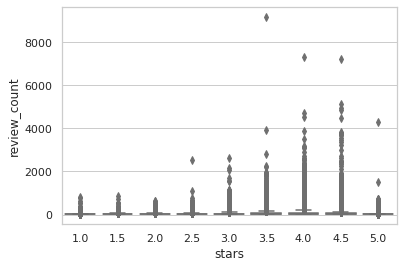

In [59]:
sns_plot = sns.boxplot(x = "stars", y = "review_count", data = yelp_business_df)
sns_plot.figure.savefig("review-count-boxplot.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


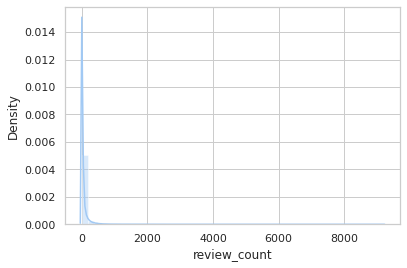

In [64]:
sns_plot = sns.distplot(yelp_business_df.review_count)
sns_plot.figure.savefig("review-count-distplot.png")

In [66]:
yelp_business_df.review_count.quantile([.75, .9, .95, .99, .999, .9999])

0.7500      48.0000
0.9000     135.0000
0.9500     243.0000
0.9900     629.0000
0.9990    1698.1010
0.9999    4020.9047
Name: review_count, dtype: float64

# PART 2: Feature Engineering

In [ ]:
# yet to do

# PART 3: Modelling

In [ ]:
# yet to do